# Проект для прогнозирования цен на ноутбуки

# 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Загрузка и изучение данных

In [2]:
df = pd.read_csv('A:/datasets/laptop_price.csv', encoding='latin1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Общая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Проверка пропущенных значений
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# 3. Предобработка данных

In [7]:
df = df.drop('laptop_ID', axis=1)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## 3.1 Обработка категориальных переменных

### 1. Обработка столбца Ram (удаление "GB" и преобразование в числовой формат):

In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

### 2. Обработка столбца Weight (удаление "kg" и преобразование в числовой формат):

In [9]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

### 3. Обработка столбца Memory (упрощение данных):

Столбец Memory содержит сложные данные (например, "128GB SSD", "1TB HDD"). Для упрощения можно извлечь только объем памяти и тип хранилища. Мы создадим два новых столбца: Memory_Size (объем в GB) и Memory_Type (тип хранилища).

In [10]:
# Функция для извлечения объёма памяти
def extract_memory_size(memory):
    total_size = 0
    parts = memory.split('+')
    for part in parts:
        part = part.strip()
        if 'TB' in part:
            size = float(''.join(filter(str.isdigit, part.split('TB')[0])))
            total_size += size * 1000

        elif 'GB' in part:
            size = float(''.join(filter(str.isdigit, part.split('GB')[0])))
            total_size += size
    return total_size

In [11]:
# Функция для извлечения типа памяти
def extract_memory_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Flash Storage' in memory:
        return 'Flash Storage'
    elif 'Hybrid' in memory:
        return 'Hybrid'
    else:
        return 'Unknown'

In [12]:
# Применение функций
df['Memory_Size'] = df['Memory'].apply(extract_memory_size)
df['Memory_Type'] = df['Memory'].apply(extract_memory_type)

In [13]:
df = df.drop('Memory', axis=1)

### 4. Обработка столбца ScreenResolution (извлечение разрешения):

In [14]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [15]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)$')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_Size,Memory_Type,Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,SSD,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,Flash Storage,1440x900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256.0,SSD,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,SSD,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,SSD,2560x1600


In [16]:
df[['Resolution_Width', 'Resolution_Height']] = df['Resolution'].str.split('x', expand=True).astype(int)

In [17]:
df = df.drop(['ScreenResolution', 'Resolution'], axis=1)
df

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_Size,Memory_Type,Resolution_Width,Resolution_Height
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,SSD,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,Flash Storage,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256.0,SSD,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,SSD,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,SSD,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,128.0,SSD,1920,1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,512.0,SSD,3200,1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,64.0,Flash Storage,1366,768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000.0,HDD,1366,768


### 5. Кодирование категориальных переменных:

In [18]:
# Список категориальных столбцов
categorical_columns = ['Company', 'Product', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Memory_Type']

# Применение LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   # Сохраняем encoder для возможного обратного преобразования

## 3.2 Проверка корреляции

In [19]:
df

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_Size,Memory_Type,Resolution_Width,Resolution_Height
0,1,300,4,13.3,65,8,58,8,1.37,1339.69,128.0,3,2560,1600
1,1,301,4,13.3,63,8,51,8,1.34,898.94,128.0,0,1440,900
2,7,50,3,15.6,74,8,53,4,1.86,575.00,256.0,3,1920,1080
3,1,300,4,15.4,85,16,9,8,1.83,2537.45,512.0,3,2880,1800
4,1,300,4,13.3,67,8,59,8,1.37,1803.60,256.0,3,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,580,0,14.0,89,4,47,5,1.80,638.00,128.0,3,1920,1080
1299,10,588,0,13.3,89,16,47,5,1.30,1499.00,512.0,3,3200,1800
1300,10,196,3,14.0,34,2,40,5,1.50,229.00,64.0,0,1366,768
1301,7,2,3,15.6,89,6,21,5,2.19,764.00,1000.0,1,1366,768


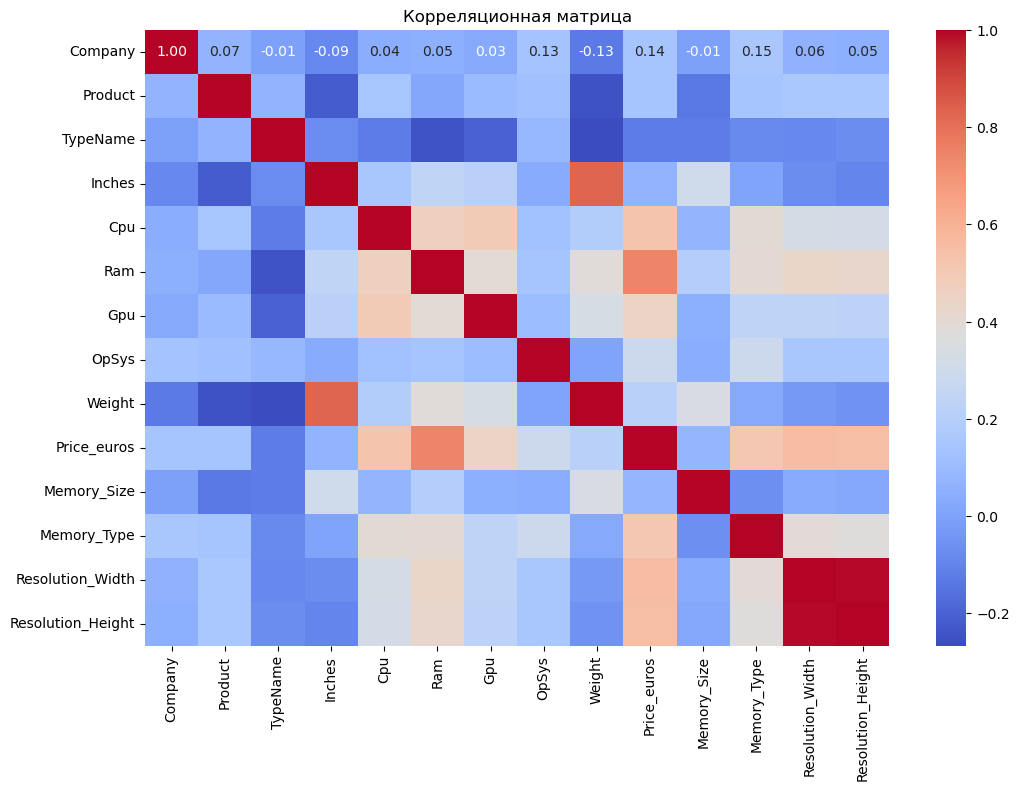

In [20]:
# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

# 4. Разделение данных

In [21]:
# Признаки (X) и целевая переменная (y)
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Разделение на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Масштабирование данных

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Обучение моделей

## 6.1 Линейная регрессия

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Предсказание
y_pred_lr = lr_model.predict(X_test_scaled)

# Оценка модели
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Линейная регрессия:")
print(f"Среднеквадратичная ошибка (MSE): {lr_mse:.2f}")
print(f"Коэффициент детерминации (R²): {lr_r2:.2f}")

Линейная регрессия:
Среднеквадратичная ошибка (MSE): 158709.78
Коэффициент детерминации (R²): 0.69


## 6.2 Случайный лес

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Предсказание
y_pred_rf = rf_model.predict(X_test_scaled)

# Оценка модели
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Случайный лес:")
print(f"Среднеквадратичная ошибка (MSE): {rf_mse:.2f}")
print(f"Коэффициент детерминации (R²): {rf_r2:.2f}")

Случайный лес:
Среднеквадратичная ошибка (MSE): 86341.67
Коэффициент детерминации (R²): 0.83


# 7. Анализ результатов

## 7.1 Визуализация

### 1. График предсказанных значений против реальных (Scatter Plot):

Этот график поможет оценить, насколько предсказания моделей близки к реальным значениям. Идеальная модель будет иметь точки, расположенные вдоль диагональной линии ( y = x ).

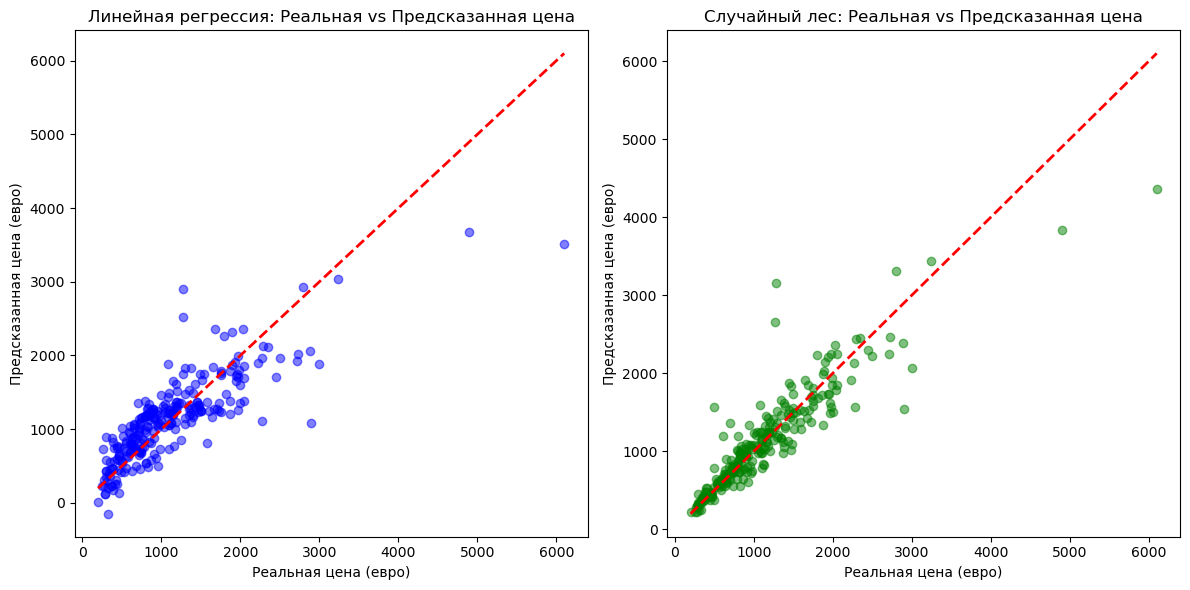

In [25]:
# Визуализация предсказаний для линейной регрессии
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальная цена (евро)')
plt.ylabel('Предсказанная цена (евро)')
plt.title('Линейная регрессия: Реальная vs Предсказанная цена')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальная цена (евро)')
plt.ylabel('Предсказанная цена (евро)')
plt.title('Случайный лес: Реальная vs Предсказанная цена')

plt.tight_layout()
plt.show()

### 2. График распределения ошибок (Residual Plot):

Этот график показывает разницу между реальными и предсказанными значениями (остатки). Идеальная модель будет иметь остатки, распределенные случайным образом вокруг нуля, без явных закономерностей.

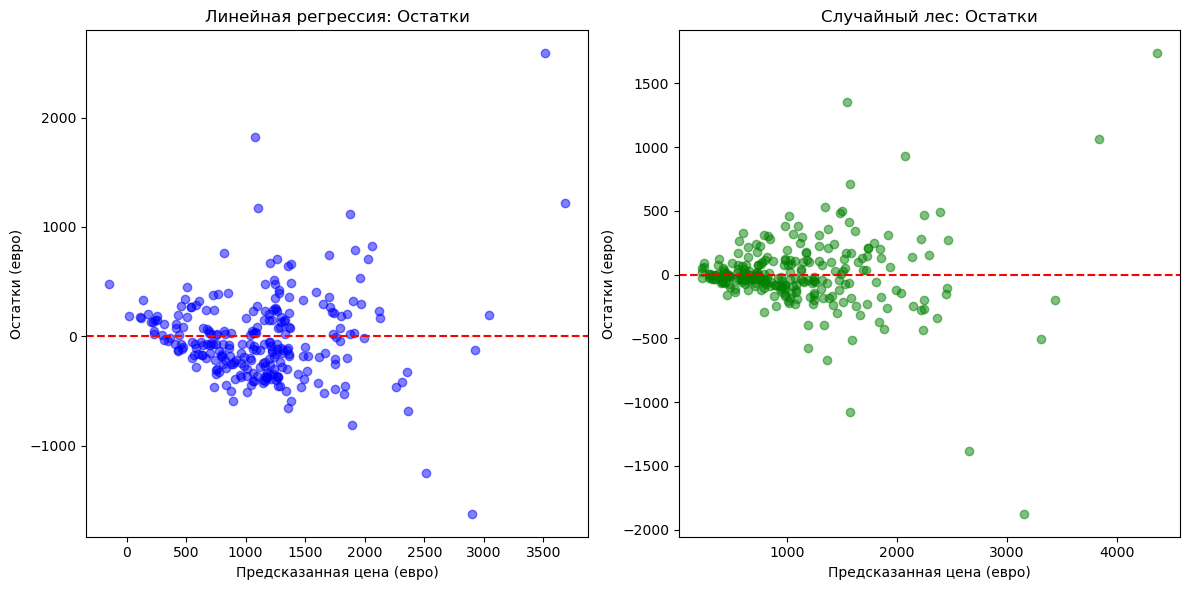

In [26]:
# Остатки для линейной регрессии
lr_residuals = y_test - y_pred_lr

# Остатки для случайного леса
rf_residuals = y_test - y_pred_rf

# Визуализация остатков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_lr, lr_residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена (евро)')
plt.ylabel('Остатки (евро)')
plt.title('Линейная регрессия: Остатки')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf, rf_residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена (евро)')
plt.ylabel('Остатки (евро)')
plt.title('Случайный лес: Остатки')

plt.tight_layout()
plt.show()

### 3. Гистограмма ошибок:

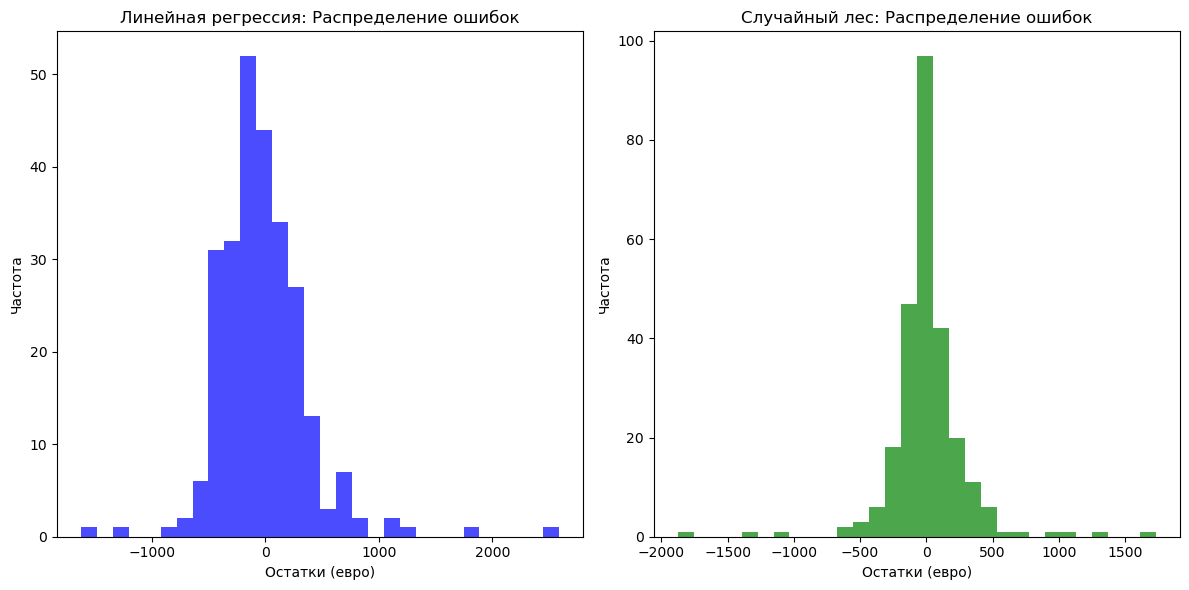

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(lr_residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Остатки (евро)')
plt.ylabel('Частота')
plt.title('Линейная регрессия: Распределение ошибок')

plt.subplot(1, 2, 2)
plt.hist(rf_residuals, bins=30, color='green', alpha=0.7)
plt.xlabel('Остатки (евро)')
plt.ylabel('Частота')
plt.title('Случайный лес: Распределение ошибок')

plt.tight_layout()
plt.show()

## 7.2 Важность признаков (для случайного леса)

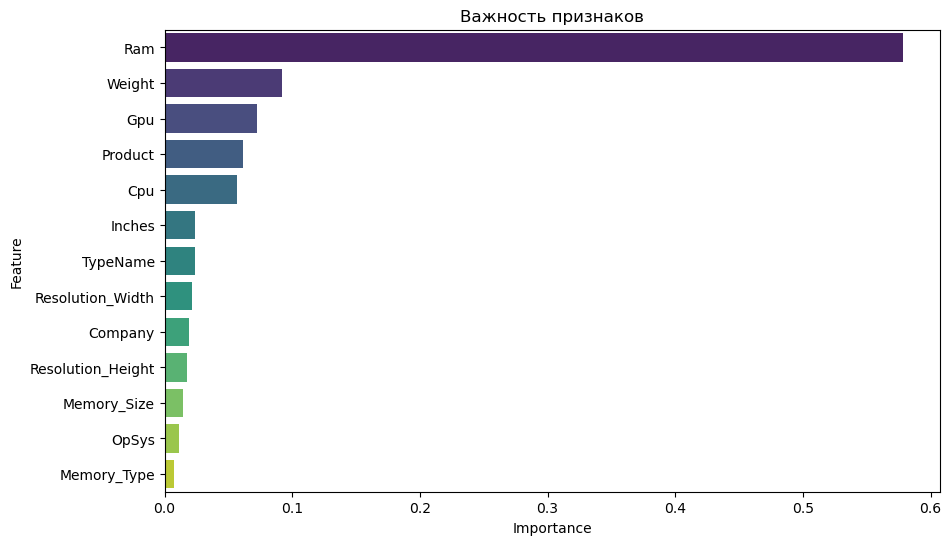

In [28]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Важность признаков')
plt.show()

Признаки с наибольшей важностью оказывают наибольшее влияние на цену.

## 7.3 Сравнение моделей

In [29]:
# Сравнение метрик
print("Сравнение моделей:")
print(f"Линейная регрессия: MSE = {lr_mse:.2f}, R² = {lr_r2:.2f}")
print(f"Случайный лес: MSE = {rf_mse:.2f}, R² = {rf_r2:.2f}")

if rf_r2 > lr_r2:
    print("Случайный лес показал лучшие результаты, чем линейная регрессия.")
else:
    print("Линейная регрессия показала лучшие результаты, чем случайный лес.")

Сравнение моделей:
Линейная регрессия: MSE = 158709.78, R² = 0.69
Случайный лес: MSE = 86341.67, R² = 0.83
Случайный лес показал лучшие результаты, чем линейная регрессия.


# 8. Оптимизация модели

## 8.1 Подбор гиперпараметров для случайного леса

Используем GridSearchCV для поиска оптимальных гиперпараметров модели случайного леса.

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Определение параметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели
rf = RandomForestRegressor(random_state=42)

# Поиск оптимальных параметров
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Лучшая модель
best_rf_model = grid_search.best_estimator_

# Предсказание с лучшей моделью
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Оценка лучшей модели
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)

print('Лучшая модель случайного леса:')
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Среднеквадратичная ошибка (MSE): {best_rf_mse:.2f}')
print(f'Коэффициент детерминации (R²): {best_rf_r2:.2f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшая модель случайного леса:
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Среднеквадратичная ошибка (MSE): 84286.06
Коэффициент детерминации (R²): 0.83


## 8.2 Использование других моделей

### 1. Пример с градиентным бустингом (GradientBoostingRegressor)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
# Обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred_gb = gb_model.predict(X_test_scaled)

# Оценка модели
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print('Градиентный бустинг:')
print(f'Среднеквадратичная ошибка (MSE): {gb_mse:.2f}')
print(f'Коэффициент детерминации (R²): {gb_r2:.2f}')

Градиентный бустинг:
Среднеквадратичная ошибка (MSE): 83271.08
Коэффициент детерминации (R²): 0.84


### 2. Пример с XGBoost

In [34]:
!pip install xgboost

In [35]:
import xgboost as xgb

In [36]:
# Обучение модели XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Оценка модели
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print('XGBoost:')
print(f'Среднеквадратичная ошибка (MSE): {xgb_mse:.2f}')
print(f'Коэффициент детерминации (R²): {xgb_r2:.2f}')

XGBoost:
Среднеквадратичная ошибка (MSE): 87460.01
Коэффициент детерминации (R²): 0.83


#### Подбор гиперпараметров для XGBoost

In [37]:
# Определение параметров для поиска
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Создание модели
xgb = xgb.XGBRegressor(random_state=42)

# Поиск оптимальных параметров
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# Лучшая модель
best_xgb_model = grid_search_xgb.best_estimator_

# Предсказания с лучшей моделью
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Оценка лучшей модели
best_xgb_mse = mean_squared_error(y_test, y_pred_best_xgb)
best_xgb_r2 = r2_score(y_test, y_pred_best_xgb)

print('Лучшая модель XGBoost:')
print(f'Лучшие параметры: {grid_search_xgb.best_params_}')
print(f'Среднеквадратичная ошибка (MSE): {best_xgb_mse:.2f}')
print(f'Коэффициент детерминации (R²): {best_xgb_r2:.2f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшая модель XGBoost:
Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Среднеквадратичная ошибка (MSE): 71780.48
Коэффициент детерминации (R²): 0.86


### 3. Пример с LightGBM

LightGBM — мощная библиотека градиентного бустинга, которая часто работает быстрее, чем XGBoost, особенно на больших наборах данных.

In [38]:
!pip install lightgbm

In [39]:
import lightgbm as lgb

In [40]:
# Обучение модели LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Оценка модели
lgb_mse = mean_squared_error(y_test, y_pred_lgb)
lgb_r2 = r2_score(y_test, y_pred_lgb)

print("LightGBM:")
print(f"Среднеквадратичная ошибка (MSE): {lgb_mse:.2f}")
print(f"Коэффициент детерминации (R²): {lgb_r2:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 1042, number of used features: 13
[LightGBM] [Info] Start training from score 1128.344711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

#### Подбор гиперпараметров для LightGBM

In [41]:
# Определение параметров для поиска
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 70],
    'subsample': [0.8, 1.0]
}

# Создание модели
lgb = lgb.LGBMRegressor(random_state=42)

# Поиск оптимальных параметров
grid_search_lgb = GridSearchCV(estimator=lgb, param_grid=param_grid_lgb, cv=5, n_jobs=-1, verbose=2)
grid_search_lgb.fit(X_train_scaled, y_train)

# Лучшая модель
best_lgb_model = grid_search_lgb.best_estimator_

# Предсказание с лучшей моделью
y_pred_best_lgb = best_lgb_model.predict(X_test_scaled)

# Оценка лучшей модели
best_lgb_mse = mean_squared_error(y_test, y_pred_best_lgb)
best_lgb_r2 = r2_score(y_test, y_pred_best_lgb)

print('Лучшая модель LightGBM:')
print(f'Лучшие параметры: {grid_search_lgb.best_params_}')
print(f'Среднеквадратическая ошибка (MSE): {best_lgb_mse:.2f}')
print(f'Коэффициент детерминации (R²): {best_lgb_r2:.2f}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 1042, number of used features: 13
[LightGBM] [Info] Start training from score 1128.344711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

### 4. Сравнение всех моделей

In [42]:
print('Сравнение всех моделей')
print(f"Линейная регрессия: MSE = {lr_mse:.2f}, R² = {lr_r2:.2f}")
print(f"Случайный лес: MSE = {rf_mse:.2f}, R² = {rf_r2:.2f}")
print(f"Градиентный бустинг: MSE = {gb_mse:.2f}, R² = {gb_r2:.2f}")
print(f"XGBoost: MSE = {xgb_mse:.2f}, R² = {xgb_r2:.2f}")
print(f"LightGBM: MSE = {lgb_mse:.2f}, R² = {lgb_r2:.2f}")
print(f"Лучшая XGBoost: MSE = {best_xgb_mse:.2f}, R² = {best_xgb_r2:.2f}")
print(f"Лучшая LightGBM: MSE = {best_lgb_mse:.2f}, R² = {best_lgb_r2:.2f}")

Сравнение всех моделей
Линейная регрессия: MSE = 158709.78, R² = 0.69
Случайный лес: MSE = 86341.67, R² = 0.83
Градиентный бустинг: MSE = 83271.08, R² = 0.84
XGBoost: MSE = 87460.01, R² = 0.83
LightGBM: MSE = 102221.73, R² = 0.80
Лучшая XGBoost: MSE = 71780.48, R² = 0.86
Лучшая LightGBM: MSE = 82825.38, R² = 0.84


In [43]:
# Определение лучшей модели
models_comparison = {
    'Linear Regression': lr_r2,
    'Random Forest': rf_r2,
    'Gradient Boosting': gb_r2,
    'XGBoost': xgb_r2,
    'LightGBM': lgb_r2,
    'Best XGBoost': best_xgb_r2,
    'Best LightGBM': best_lgb_r2
}

best_model_name = max(models_comparison, key=models_comparison.get)
print(f'\nЛучшая модель: {best_model_name} c R² = {models_comparison[best_model_name]:.2f}')


Лучшая модель: Best XGBoost c R² = 0.86


## 8.3 Использование нейронных сетей

### 1. Создание и обучение нейронной сети

In [44]:
pip install tensorflow==2.18

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

**Архитектура сети:** Простая полносвязная нейронная сеть с тремя скрытыми слоями (128, 64 и 32 нейрона) и функцией активации *ReLU*.  
**Выходной слой:** Имеет один нейрон без функции активации, так как это задача регрессии.  
**Dropout:** Добавлен для предотвращения переобучения (20% нейронов случайным образом отключаются на каждой итерации).  
**Оптимизатор:** Используется `adam`, который хорошо подходит для большинства задач.  
**Функция потерь:** Используется `mse` (среднеквадратичная ошибка), так как это задача регрессии.  
**Ранняя остановка:** Если качество на валидационной выборке перестает улучшаться в течение 10 эпох, обучение останавливается, и восстанавливаются лучшие веса.еса.

In [46]:
# Создание модели нейронной сети
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Ранняя остановка для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Предсказание
y_pred_nn = model.predict(X_test_scaled).flatten()

# Оценка модели
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

print('Нейронная сеть:')
print(f'Среднеквадратичная ошибка (MSE): {nn_mse:.2f}')
print(f'Коэффициент детерминации (R²): {nn_r2:.2f}')

Epoch 1/100


A:\Mikhailiuk\SOFT\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1738345.0000 - mae: 1117.5287 - val_loss: 1744684.8750 - val_mae: 1135.9374
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1723685.6250 - mae: 1108.0278 - val_loss: 1667043.8750 - val_mae: 1106.6091
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1754344.0000 - mae: 1111.5391 - val_loss: 1372971.7500 - val_mae: 995.0965
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1281616.8750 - mae: 924.5801 - val_loss: 708216.8750 - val_mae: 683.4084
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 520565.1250 - mae: 571.5916 - val_loss: 256603.4688 - val_mae: 371.9210
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 186720.6406 - mae: 312.3406 - val_loss: 226778.3281 - val_mae: 347.8191
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168823.5469 - mae: 289.8808 - val_loss: 191274.9844 - val_mae: 323.5354
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 143650.3750 - mae: 282.

### 2. Визуализация процесса обучения

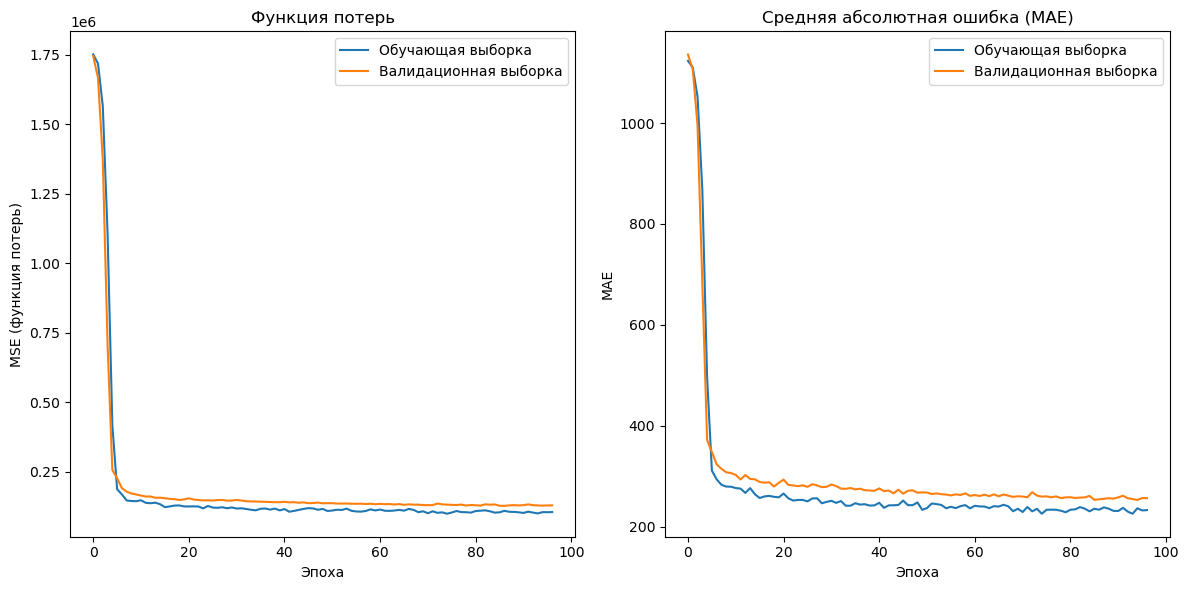

In [47]:
# График функции потерь
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Валидационная выборка')
plt.xlabel('Эпоха')
plt.ylabel('MSE (функция потерь)')
plt.title('Функция потерь')
plt.legend()

# График метрики MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Обучающая выборка')
plt.plot(history.history['val_mae'], label='Валидационная выборка')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.title('Средняя абсолютная ошибка (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

#### Интерпретация графиков

Если функция потерь на валидационной выборке начинает расти, а на обучающей продолжает падать, это признак переобучения

Если обе кривые стабилизируются, модель достигла своего предела на текущих данных

### 3. Оптимизация нейронной сети

Если результаты нейронной сети неудовлетворительны, можно попробовать улучшить модель, изменяя архитектуру или гиперпараметры.  

**Вот несколько подходов:**  

**Изменение архитектуры сети:** Добавить больше слоев или нейронов, изменить функцию активации (например, tanh вместо relu), или увеличить/уменьшить коэффициент Dropout.  
**Изменение гиперпараметров:** Изменить скорость обучения (learning_rate), размер батча (batch_size) или количество эпох (epochs).  
**Нормализация данных:** Убедиться, что данные хорошо масштабированы (мы уже использовали StandardScaler, но можно попробовать другие методы, например, MinMaxScaler).  
**Аугментация данных:** Если данных мало, можно попробовать искусственно увеличить объем данных, используя методы аугментации (например, добавление шума к числовым признакам).

#### Пример изменения скорости обучения


In [48]:
from tensorflow.keras.optimizers import Adam

In [49]:
# Создание модели с изменённой скоростью обучения
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компиляция модели с изменённой скоростью обучения
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Предсказание
y_pred_nn = model.predict(X_test_scaled).flatten()

# Оценка модели
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

print('Нейронная сеть (с изменённой скоростью обучения):')
print(f'Среднеквадратичная ошибка (MSE): {nn_mse:.2f}')
print(f'Коэффициент детерминации (R²): {nn_r2:.2f}')

Epoch 1/100


A:\Mikhailiuk\SOFT\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1699206.2500 - mae: 1113.3605 - val_loss: 1745404.1250 - val_mae: 1136.3729
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1719073.5000 - mae: 1118.2087 - val_loss: 1689691.8750 - val_mae: 1115.2314
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1710665.7500 - mae: 1101.3062 - val_loss: 1492566.2500 - val_mae: 1041.8408
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1333552.6250 - mae: 975.7850 - val_loss: 1008955.8750 - val_mae: 841.3348
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 835335.1250 - mae: 748.1649 - val_loss: 368331.7188 - val_mae: 459.9419
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 284058.4688 - mae: 388.5245 - val_loss: 233467.1562 - val_mae: 361.1187
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160835.3438 - mae: 292.4012 - val_loss: 201620.4375 - val_mae: 333.3564
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164645.5312 - mae: 29

### 4. Сравнение с другими моделями

In [50]:
# Обновлённое сравнение всех моделей
print("Сравнение всех моделей:")
print(f"Линейная регрессия: MSE = {lr_mse:.2f}, R² = {lr_r2:.2f}")
print(f"Случайный лес: MSE = {rf_mse:.2f}, R² = {rf_r2:.2f}")
print(f"Градиентный бустинг: MSE = {gb_mse:.2f}, R² = {gb_r2:.2f}")
print(f"XGBoost: MSE = {xgb_mse:.2f}, R² = {xgb_r2:.2f}")
print(f"LightGBM: MSE = {lgb_mse:.2f}, R² = {lgb_r2:.2f}")
print(f"Лучшая XGBoost: MSE = {best_xgb_mse:.2f}, R² = {best_xgb_r2:.2f}")
print(f"Лучшая LightGBM: MSE = {best_lgb_mse:.2f}, R² = {best_lgb_r2:.2f}")
print(f"Нейронная сеть: MSE = {nn_mse:.2f}, R² = {nn_r2:.2f}")

Сравнение всех моделей:
Линейная регрессия: MSE = 158709.78, R² = 0.69
Случайный лес: MSE = 86341.67, R² = 0.83
Градиентный бустинг: MSE = 83271.08, R² = 0.84
XGBoost: MSE = 87460.01, R² = 0.83
LightGBM: MSE = 102221.73, R² = 0.80
Лучшая XGBoost: MSE = 71780.48, R² = 0.86
Лучшая LightGBM: MSE = 82825.38, R² = 0.84
Нейронная сеть: MSE = 132994.29, R² = 0.74


In [51]:
# Обновление словаря сравнения
models_comparison['Neural Network'] = nn_r2

best_model_name = max(models_comparison, key=models_comparison.get)
print(f'\nЛучшая модель: {best_model_name} с R² = {models_comparison[best_model_name]:.2f}')


Лучшая модель: Best XGBoost с R² = 0.86


# 9. Сохранение лучшей модели

После выбора лучшей модели (например, best_xgb_model, best_lgb_model или нейронной сети) важно сохранить ее, чтобы использовать в будущем без необходимости повторного обучения.  
Это особенно полезно, если планируется интегрировать модель в приложение, веб-сервис или использовать ее для предсказаний на новых данных.  
Также важно сохранить объекты предобработки (например, StandardScaler и LabelEncoder), чтобы корректно обрабатывать новые данные.

## 9.1 Сохранение модели машинного обучения (XGBoost, LightGBM, RandomForest и др.)

In [52]:
import joblib

In [53]:
# Сохранение лучшей модели XGBoost
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')
print("Модель XGBoost сохранена как 'best_xgb_model.pkl'")

Модель XGBoost сохранена как 'best_xgb_model.pkl'


In [54]:
# Сохранение лучшей модели LightGBM:
joblib.dump(best_lgb_model, 'best_lgb_model.pkl')
print("Модель LightGBM сохранена как 'best_lgb_model.pkl'")

Модель LightGBM сохранена как 'best_lgb_model.pkl'


In [55]:
# Альтернативный способ (встроенный метод LightGBM)
best_lgb_model.booster_.save_model('best_lgb_model.txt')
print("Модель LightGBM сохранена как 'best_lgb_model.txt'")

Модель LightGBM сохранена как 'best_lgb_model.txt'


## Сохранение объектов предобработки

In [56]:
# Сохранение StandardScaler
joblib.dump(scaler, 'scaler.pkl')
print("Объект StandardScaler сохранен как 'scaler.pkl'")

Объект StandardScaler сохранен как 'scaler.pkl'


In [57]:
# Сохранение LabelEncoder для каждого категориального столбца
for col, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{col}.pkl')
    print(f"Объект LabelEncoder для столбца '{col}' сохранён как 'label_encoder_{col}.pkl'")

Объект LabelEncoder для столбца 'Company' сохранён как 'label_encoder_Company.pkl'
Объект LabelEncoder для столбца 'Product' сохранён как 'label_encoder_Product.pkl'
Объект LabelEncoder для столбца 'TypeName' сохранён как 'label_encoder_TypeName.pkl'
Объект LabelEncoder для столбца 'Cpu' сохранён как 'label_encoder_Cpu.pkl'
Объект LabelEncoder для столбца 'Gpu' сохранён как 'label_encoder_Gpu.pkl'
Объект LabelEncoder для столбца 'OpSys' сохранён как 'label_encoder_OpSys.pkl'
Объект LabelEncoder для столбца 'Memory_Type' сохранён как 'label_encoder_Memory_Type.pkl'


## 9.2 Сохранение нейронной сети

Для сохранения нейронной сети, построенной с помощью TensorFlow/Keras, используются встроенные методы model.save() или сохранение весов и архитектуры отдельно.


In [58]:
# Сохранение всей модели нейронной сети
model.save('neural_network_model.keras')
print("Нейронная сеть сохранена как 'neural_network_model.keras'")

Нейронная сеть сохранена как 'neural_network_model.keras'


In [59]:
# Сохранение только весов
model.save('neural_network_weights.keras')
print("Веса нейронной сети сохранены как 'neural_network_weights.keras'")

Веса нейронной сети сохранены как 'neural_network_weights.keras'


## 9.3 Загрузка сохранённой модели

Чтобы использовать сохраненную модель для предсказаний на новых данных, нужно загрузить модель и объекты предобработки.  


In [60]:
# Загрузка модели XGBoost
loaded_xgb_model = joblib.load('best_xgb_model.pkl')
print("Модель XGBoost загружена")

Модель XGBoost загружена


In [61]:
# Загрузка StandartScaler
loaded_scaler = joblib.load('scaler.pkl')
print("Объект StandartScaler загружен")

Объект StandartScaler загружен


In [62]:
# Загрузка LabelEncoder для каждого категориального столбца
loaded_label_encoders = {}
for col in categorical_columns:
    loaded_label_encoders[col] = joblib.load(f'label_encoder_{col}.pkl')
    print(f"Объект LabelEncoder для столбца '{col} загружен'")

Объект LabelEncoder для столбца 'Company загружен'
Объект LabelEncoder для столбца 'Product загружен'
Объект LabelEncoder для столбца 'TypeName загружен'
Объект LabelEncoder для столбца 'Cpu загружен'
Объект LabelEncoder для столбца 'Gpu загружен'
Объект LabelEncoder для столбца 'OpSys загружен'
Объект LabelEncoder для столбца 'Memory_Type загружен'


### Для нейронной сети

In [63]:
from tensorflow.keras.models import load_model

In [64]:
# Загрузка всей модели нейронной сети
loded_nn_model = load_model('neural_network_model.keras')
print("Нейронная сеть загружена")

Нейронная сеть загружена


## 9.4 Пример использования загруженной модели для предсказания

### Пример для XGBoost

In [65]:
# Пример новых данных
new_data = pd.DataFrame({
    'Company': ['Apple'],
    'Product': ['MacBook Pro'],
    'TypeName': ['Ultrabook'],
    'Inches': [13.3],
    'ScreenResolution': ['IPS Panel Retina Display 2560x1600'],
    'Cpu': ['Intel Core i5 2.3GHz'],
    'Ram': ['8GB'],
    'Memory': ['128GB SSD'],
    'Gpu': ['Intel Iris Plus Graphics 640'],
    'OpSys': ['macOS'],
    'Weight': ['1.37kg']
})

### Предобработка новых данных

#### 1. Удаление ненужных столбцов

In [66]:
if 'laptop_ID' in new_data.columns:
    new_data = new_data.drop('laptop_ID', axis=1)

#### 2. Обработка Ram

In [67]:
new_data['Ram'] = new_data['Ram'].str.replace('GB', '').astype(int)

#### 3. Обработка Weight

In [68]:
new_data['Weight'] = new_data['Weight'].str.replace('kg', '').astype(float)

#### 4. Обработка Memory

In [69]:
new_data['Memory_Size'] = new_data['Memory'].apply(extract_memory_size)
new_data['Memory_Type'] = new_data['Memory'].apply(extract_memory_type)
new_data = new_data.drop('Memory', axis=1)

#### 5. Обработка ScreenResolution

In [70]:
new_data['Resolution'] = new_data['ScreenResolution'].str.extract(r'(\d+x\d+)$')
new_data[['Resolution_Width', 'Resolution_Height']] = new_data['Resolution'].str.split('x', expand=True).astype(int)
new_data = new_data.drop(['ScreenResolution', 'Resolution'], axis=1)

#### 6. Кодирование категориальных признаков

In [71]:
for col in categorical_columns:
    new_data[col] = loaded_label_encoders[col].transform(new_data[col])

#### 7. Масштабирование числовых признаков с использованием загруженного scaler

In [72]:
new_data_scaled = loaded_scaler.transform(new_data)

#### 8. Предсказание с использованием загруженной модели XGBoost

In [73]:
new_prediction = loaded_xgb_model.predict(new_data_scaled)
print(f"Предсказанная цена для нового ноутбука: {new_prediction[0]:.2f} евро")

Предсказанная цена для нового ноутбука: 1436.51 евро


#### 9. Предсказание с использованием загруженной нейронной сети

In [74]:
new_prediction_nn = loded_nn_model.predict(new_data_scaled).flatten()
print(f"Предсказанная цена для нового ноутбука (нейронная сеть): {new_prediction_nn[0]:.2f} евро")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Предсказанная цена для нового ноутбука (нейронная сеть): 1823.79 евро


# 10. Интерпретация результатов и выводы

#### Качество моделей


| Модель              | MSE         | R²   |
|---------------------|-------------|------|
| Линейная регрессия  | 158709.78   | 0.69 |
| Случайный лес       | 86341.67    | 0.83 |
| Градиентный бустинг | 83271.08    | 0.84 |
| XGBoost             | 87460.01    | 0.83 |
| LightGBM            | 102221.73   | 0.80 |
| Best XGBoost        | 71780.48    | 0.86 |
| Best LightGBM       | 82825.38    | 0.84 |
| Нейронная сеть      | 130739.59   | 0.74 | | 0.74 |

In [75]:
print(f"Лучшая модель: {best_model_name} с R² = {models_comparison[best_model_name]:.2f}")

Лучшая модель: Best XGBoost с R² = 0.86


#### Важность признаков

In [76]:
for best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Best XGBoost', 'Best LightGBM']:
    if best_model_name == 'Random Forest':
        best_model = rf_model
    elif best_model_name == 'Gradient Boosting':
        best_model = gb_model
    elif best_model_name == 'XGBoost':
        best_model = xgb_model
    elif best_model_name == 'LightGBM':
        best_model = lgb_model
    elif best_model_name == 'Best XGBoost':
        best_model = best_xgb_model
    elif best_model_name == 'Best LightGBM':
        best_model = best_lgb_model

    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    })
    feature_importances_ = feature_importance.sort_values(by='Importance', ascending=False)
    print(f"\nНаиболее важные признаки: {best_model_name}")
    print(feature_importance.head(5))


Наиболее важные признаки: Random Forest
    Feature  Importance
0   Company    0.019398
1   Product    0.061483
2  TypeName    0.023761
3    Inches    0.023804
4       Cpu    0.056940

Наиболее важные признаки: Gradient Boosting
    Feature  Importance
0   Company    0.010342
1   Product    0.047252
2  TypeName    0.022239
3    Inches    0.018054
4       Cpu    0.088126

Наиболее важные признаки: XGBoost
    Feature  Importance
0   Company    0.009547
1   Product    0.012714
2  TypeName    0.028519
3    Inches    0.021111
4       Cpu    0.055920

Наиболее важные признаки: LightGBM
    Feature  Importance
0   Company          36
1   Product         103
2  TypeName          27
3    Inches          33
4       Cpu          52

Наиболее важные признаки: Best XGBoost
    Feature  Importance
0   Company    0.013197
1   Product    0.018252
2  TypeName    0.038358
3    Inches    0.027482
4       Cpu    0.056922

Наиболее важные признаки: Best LightGBM
    Feature  Importance
0   Company       

#### Проблемы и ограничения

**1.** Ограниченный объём данных может снижать качество моделей, особенно нейронных сетей  
**2.** Категориальные признаки с большим количеством уникальных значений (например, 'Product' могут усложнять обучение)  
**3.** Возможное переобучение моделей на небольших данных, особенно для сложных алгоритмов

#### Рекомендации

**-** Собрать больше данных для улучшения качества моделей  
**-** Попробовать более сложные методы предобработки, такие как целевое кодирование (target encoding) для категориальных признаков)  
**-** Использовать аксамблевые методы, комбинируя предсказания нескольких моделей (stacking)  
**-** Интегрировать модель в реальное приложение, например, для автоматического ценообразования в интернет-магазинах

#### Визуализация сравнения модели

A:\Mikhailiuk\SOFT\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


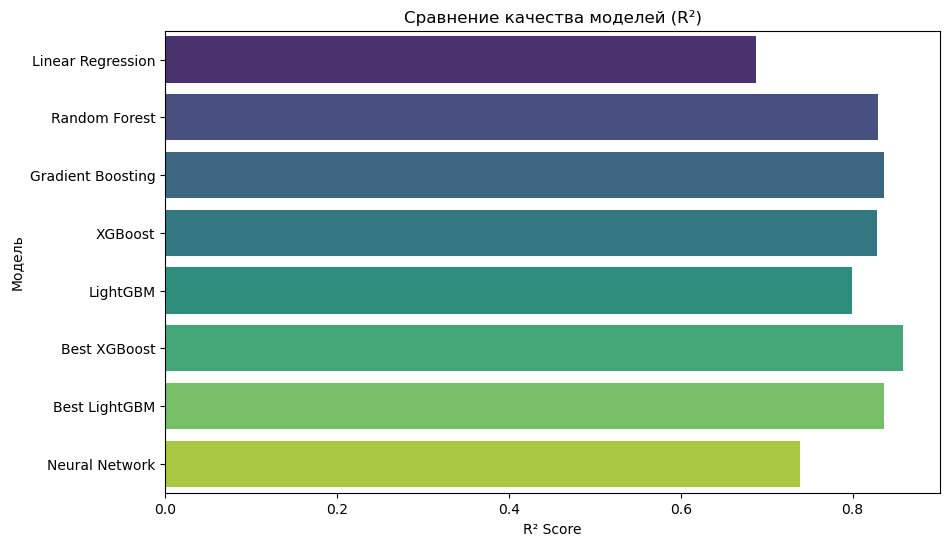

In [77]:
plt.figure(figsize=(10, 6))
models_names = list(models_comparison.keys())
models_r2 = list(models_comparison.values())
sns.barplot(x=models_r2, y=models_names, palette='viridis')
plt.xlabel('R² Score')
plt.ylabel('Модель')
plt.title('Сравнение качества моделей (R²)')
plt.show()